In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import math 

print(tf.__version__)

1.8.0


Declaration of functions

In [200]:
df = pd.read_csv('../Dados/MeusDados/df_estado_raca_idade_fin.csv', sep=',')

In [201]:
len(df)

4374

Shuffling

In [202]:
df = df.sample(frac=1).reset_index(drop=True)

In [203]:
len(df)

4374

In [205]:
df

Unnamed: 0          UF.REGIÃO    lat    lon  X2013  cordepele     prob1  \
0           2704          Tocantins -10.16 -48.33    5.5          1  0.022285   
1           1574           SãoPaulo -23.54 -46.63    2.7          0  0.010940   
2           4003     Santa Catarina -27.59 -48.54    3.3          1  0.013371   
3           2183    MatoGrossodoSul -20.44 -54.64    3.6          0  0.014587   
4             57               Acre  -9.97 -67.81    3.2          0  0.012966   
5           2370           Amazonas  -3.10 -60.02    5.1          1  0.020665   
6            874           Maranhão  -2.53 -44.30    3.1          0  0.012561   
7           3854             Paraná -25.42 -49.27    3.6          1  0.014587   
8           2210               Acre  -9.97 -67.81   10.4          1  0.042139   
9           2975              Ceará  -3.71 -38.54    4.1          1  0.016613   
10          1626             Paraná -25.42 -49.27    5.6          0  0.022690   
11          2180    MatoGrossodoSul -20.44 -54.64    3.6          0  0.014587   
12          1386        MinasGerais -19.81 -43.95    3.1          0  0.012561   
13          1371      EspíritoSanto -20.31 -40.33    4.5          0  0.018233   
14          1716     RioGrandedoSul -30.03 -51.23    3.7          0  0.014992   
15           380           Rondônia  -8.76 -63.90    6.4          0  0.025932   
16          1992              Goiás -16.67 -49.25    4.9          0  0.019854   
17          1499       RiodeJaneiro -22.90 -43.20    3.2          0  0.012966   
18          2718          Tocantins -10.16 -48.33    5.5          1  0.022285   
19           792              Ceará  -3.71 -38.54    2.3          0  0.009319   
20           464            Roraima   2.82 -60.67    0.0          0  0.000000   
21          2679          Tocantins -10.16 -48.33    5.5          1  0.022285   
22          1187   RioGrandedoNorte  -5.79 -35.20    2.7          0  0.010940   
23          2120    MatoGrossodoSul -20.44 -54.64    3.6          0  0.014587   
24           484            Roraima   2.82 -60.67    0.0          0  0.000000   
25          2990              Ceará  -3.71 -38.54    4.1          1  0.016613   
26          3957  Rio Grande do Sul -30.03 -51.23    3.1          1  0.012561   
27          1665             Paraná -25.42 -49.27    5.6          0  0.022690   
28          3438            Sergipe -10.91 -37.07    6.0          1  0.024311   
29           248               Pará  -1.45 -48.50    3.9          0  0.015802   
...          ...                ...    ...    ...    ...        ...       ...   
4344         624            Alagoas  -9.66 -35.73    3.6          0  0.014587   
4345          10               Acre  -9.97 -67.81    3.2          0  0.012966   
4346         196           Amazonas  -3.10 -60.02    1.8          0  0.007293   
4347        3987     Santa Catarina -27.59 -48.54    3.3          1  0.013371   
4348        3629       Minas Gerais -19.81 -43.95    4.6          1  0.018639   
4349        1991              Goiás -16.67 -49.25    4.9          0  0.019854   
4350        1759     RioGrandedoSul -30.03 -51.23    3.7          0  0.014992   
4351        1868    DistritoFederal -15.78 -47.93    1.8          0  0.007293   
4352         407            Roraima   2.82 -60.67    0.0          0  0.000000   
4353        2514           Rondônia  -8.76 -63.90    5.0          1  0.020259   
4354        1772     RioGrandedoSul -30.03 -51.23    3.7          0  0.014992   
4355          76               Acre  -9.97 -67.81    3.2          0  0.012966   
4356        1735     RioGrandedoSul -30.03 -51.23    3.7          0  0.014992   
4357        1265            Sergipe -10.91 -37.07    2.6          0  0.010535   
4358         377           Rondônia  -8.76 -63.90    6.4          0  0.025932   
4359        1278            Sergipe -10.91 -37.07    2.6          0  0.010535   
4360        3127            Paraíba  -7.11 -34.86    8.2          1  0.033225   
4361        3664     Rio de Janeiro -

In [166]:
df = df.drop((df[df.facRisco < 20].index | df[df.facRisco > 90].index))

In [167]:
df

Unnamed: 0            UF.REGIÃO    lat    lon  X2013  cordepele  \
3            274                 Pará  -1.45 -48.50    3.9          0   
4           1648               Paraná -25.42 -49.27    5.6          0   
5           2554             Rondônia  -8.76 -63.90    5.0          1   
6           2026           MatoGrosso -15.59 -56.09    5.0          0   
10            33                 Acre  -9.97 -67.81    3.2          0   
12          1962                Goiás -16.67 -49.25    4.9          0   
15          4267          Mato Grosso -15.59 -56.09    5.9          1   
16          3907    Rio Grande do Sul -30.03 -51.23    3.1          1   
19          3439              Sergipe -10.91 -37.07    6.0          1   
20          4235          Mato Grosso -15.59 -56.09    5.9          1   
21          1328        EspíritoSanto -20.31 -40.33    4.5          0   
24          4258          Mato Grosso -15.59 -56.09    5.9          1   
25          4257          Mato Grosso -15.59 -56.09    5.9          1   
26          2944                Ceará  -3.71 -38.54    4.1          1   
27           288                 Pará  -1.45 -48.50    3.9          0   
30          4102      DistritoFederal -15.78 -47.93    8.3          1   
36          3373  Rio Grande do Norte  -5.79 -35.20    5.8          1   
37          2292                Amapá   0.03 -51.06    5.6          1   
39          1887      DistritoFederal -15.78 -47.93    1.8          0   
40          1745       RioGrandedoSul -30.03 -51.23    3.7          0   
41          2945                Ceará  -3.71 -38.54    4.1          1   
44          3677       Rio de Janeiro -22.90 -43.20    5.4          1   
45          4098      DistritoFederal -15.78 -47.93    8.3          1   
47           851             Maranhão  -2.53 -44.30    3.1          0   
49           811             Maranhão  -2.53 -44.30    3.1          0   
51          1560             SãoPaulo -23.54 -46.63    2.7          0   
52          3198           Pernambuco  -8.05 -34.88    7.2          1   
54          1312        EspíritoSanto -20.31 -40.33    4.5          0   
55           512            Tocantins -10.16 -48.33    3.8          0   
60          2225                 Acre  -9.97 -67.81   10.4          1   
...          ...                  ...    ...    ...    ...        ...   
4318        2040           MatoGrosso -15.59 -56.09    5.0          0   
4319        3135              Paraíba  -7.11 -34.86    8.2          1   
4320        3540       Espírito Santo -20.31 -40.33   11.1          1   
4322        4227          Mato Grosso -15.59 -56.09    5.9          1   
4323         997           Pernambuco  -8.05 -34.88    1.5          0   
4324        3601         Minas Gerais -19.81 -43.95    4.6          1   
4326        1076                Piauí  -5.08 -42.80    2.4          0   
4327        2608              Roraima   2.82 -60.67    8.0          1   
4329        3832               Paraná -25.42 -49.27    3.6          1   
4330        2140      MatoGrossodoSul -20.44 -54.64    3.6          0   
4331        1255              Sergipe -10.91 -37.07    2.6          0   
4333        3177           Pernambuco  -8.05 -34.88    7.2          1   
4335        2146      MatoGrossodoSul -20.44 -54.64    3.6          0   
4336        4326   Mato Grosso do Sul -20.44 -54.64    5.9          1   
4337        3138              Paraíba  -7.11 -34.86    8.2          1   
4338          20                 Acre  -9.97 -67.81    3.2          0   
4342        3835               Paraná -25.42 -49.27    3.6          1   
4344        2125      MatoGrossodoSul -20.44 -54.64    3.6          0   
4345        3512       Espírito Santo -20.31 -40.33   11.1          1   
4348        1070                Piauí  -5.08 -42.80    2.4          0   
4352         605              Alagoas  -9.66 -35.73    3.6          0   
4354          19                 Acre  -9.97 -67.81    3.2          0   
4356        2553             Rondônia  -8.76 -63.90    5.0      

In [168]:
len(df)

1939

In [169]:
split = 0.8
i_split = int(len(df) * split)

In [170]:
header_names = ["lat","lon","cordepele","idade"]

In [171]:
label_name = ['facRisco']

In [172]:
train_data = df.get(header_names).values[:i_split]

In [173]:
train_label = df.get(label_name).values[:i_split]

In [174]:
test_data = df.get(header_names).values[i_split:]

In [175]:
test_label = df.get(label_name).values[i_split:]

In [176]:
test_label

array([[10.86086086],
       [20.27027027],
       [16.21621622],
       [17.71771772],
       [11.26126126],
       [20.27027027],
       [21.62162162],
       [16.24124124],
       [69.44444444],
       [75.        ],
       [83.33333333],
       [28.82882883],
       [35.13513514],
       [12.16216216],
       [12.96296296],
       [22.07207207],
       [28.62862863],
       [20.02002002],
       [10.01001001],
       [20.67067067],
       [14.36436436],
       [51.9019019 ],
       [14.36436436],
       [63.61361361],
       [14.38938939],
       [12.16216216],
       [17.61761762],
       [26.37637638],
       [31.90690691],
       [42.66766767],
       [17.56756757],
       [15.01501502],
       [10.41041041],
       [13.51351351],
       [16.89189189],
       [23.42342342],
       [23.42342342],
       [24.04904905],
       [12.61261261],
       [16.26626627],
       [16.21621622],
       [12.01201201],
       [16.66666667],
       [12.61261261],
       [19.61961962],
       [32

In [177]:
len(train_data) - len(train_label)

0

In [178]:
len(test_data) - len(test_label)

0

In [179]:
train_data

array([[ -1.45, -48.5 ,   0.  ,  30.  ],
       [-25.42, -49.27,   0.  ,  27.  ],
       [ -8.76, -63.9 ,   1.  ,  42.  ],
       ...,
       [  2.82, -60.67,   1.  ,  32.  ],
       [ -7.11, -34.86,   1.  ,  46.  ],
       [ -9.97, -67.81,   0.  ,  28.  ]])

In [180]:
train_label

array([[33.18318318],
       [37.83783784],
       [17.51751752],
       ...,
       [52.05205205],
       [26.67667668],
       [20.82082082]])

In [181]:
test_data

array([[ -2.53, -44.3 ,   0.  ,  42.  ],
       [-22.9 , -43.2 ,   1.  ,   0.  ],
       [ -5.08, -42.8 ,   0.  ,  19.  ],
       ...,
       [  2.82, -60.67,   1.  ,  14.  ],
       [ -1.45, -48.5 ,   1.  ,  16.  ],
       [-10.16, -48.33,   1.  ,   0.  ]])

In [182]:
test_label 

array([[10.86086086],
       [20.27027027],
       [16.21621622],
       [17.71771772],
       [11.26126126],
       [20.27027027],
       [21.62162162],
       [16.24124124],
       [69.44444444],
       [75.        ],
       [83.33333333],
       [28.82882883],
       [35.13513514],
       [12.16216216],
       [12.96296296],
       [22.07207207],
       [28.62862863],
       [20.02002002],
       [10.01001001],
       [20.67067067],
       [14.36436436],
       [51.9019019 ],
       [14.36436436],
       [63.61361361],
       [14.38938939],
       [12.16216216],
       [17.61761762],
       [26.37637638],
       [31.90690691],
       [42.66766767],
       [17.56756757],
       [15.01501502],
       [10.41041041],
       [13.51351351],
       [16.89189189],
       [23.42342342],
       [23.42342342],
       [24.04904905],
       [12.61261261],
       [16.26626627],
       [16.21621622],
       [12.01201201],
       [16.66666667],
       [12.61261261],
       [19.61961962],
       [32

In [183]:
train_mean = np.mean(train_data, axis=0) 

In [184]:
train_mean

array([-12.55728562, -47.37361702,   0.60219213,  31.6686009 ])

In [185]:
train_std = np.std(train_data, axis=0)

In [186]:
train_std

array([ 8.45997948,  9.13838613,  0.48944537, 13.0271665 ])

In [187]:
train_norm = (train_data - train_mean)/train_std

train_norm

array([[ 1.31292111, -0.12325841, -1.23035618, -0.12808625],
       [-1.5204191 , -0.20751837, -1.23035618, -0.35837424],
       [ 0.44885282, -1.80845751,  0.81277277,  0.79306571],
       ...,
       [ 1.81765046, -1.45500341,  0.81277277,  0.02543908],
       [ 0.64388875,  1.3693465 ,  0.81277277,  1.10011637],
       [ 0.30582647, -2.23632299, -1.23035618, -0.28161158]])

In [188]:
test_mean = np.mean(test_data,axis=0)
test_std = np.std(test_data,axis=0)

test_norm = (test_data - test_mean)/test_std

test_norm

array([[ 1.35189273,  0.30620888, -1.18112731,  0.70781732],
       [-1.0799505 ,  0.42775945,  0.84664878, -2.65307751],
       [ 1.04746464,  0.47195965, -1.18112731, -1.13267271],
       ...,
       [ 1.99059481, -1.50268452,  0.84664878, -1.53277923],
       [ 1.48082698, -0.15789327,  0.84664878, -1.37273662],
       [ 0.44099612, -0.13910818,  0.84664878, -2.65307751]])

Construction of the model and running over the normalized files

In [189]:
def build_model(shape_of_np_array):
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(shape_of_np_array,)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  #Definition of the function to minimize (loss function)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

In [190]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('epoch')
    print('.'),



Definition of model and fit call

In [191]:
model = build_model(train_norm.shape[1]) 
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

#for con in range(len(mynp_train_super_array)):

#for con in range(3):

EPOCHS = 100

model.fit(train_norm, train_label, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

#model.fit_generator(data_gen(1), epochs=EPOCHS, steps_per_epoch = 3, verbose=0, callbacks=[early_stop, PrintDot()])


epoch
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

From here is independent of the fit procedure, as long as it produces a model that can predict something

In [192]:
#test_predictions = test_predictions_total/len(mynp_train_super_array)
#test_predictions = test_predictions_total
test_predictions = model.predict(test_norm).flatten()
test_predictions

array([10.216382 ,  8.053317 , 16.721918 , 29.830122 , 13.0002165,
       26.100645 , 16.255663 , 14.268609 , 63.05546  , 66.40007  ,
       71.134476 , 32.02194  , 19.90717  , 15.991746 , 13.825128 ,
       19.801126 , 22.857178 , 33.104404 , 11.824164 , 24.956861 ,
       15.577327 , 36.253017 , 16.484558 , 47.667828 , 18.527689 ,
       15.898906 , 12.736635 , 21.33811  , 37.24893  , 38.68636  ,
       26.137049 , 17.222216 , 19.177109 , 16.01865  , 17.591484 ,
       30.543253 , 23.067781 , 21.326029 , 11.634852 , 17.257288 ,
       21.633373 , 16.75836  , 12.830586 , 25.62524  , 18.945627 ,
       14.094248 , 12.304421 , 60.42126  , 25.907604 , 16.646658 ,
       35.11401  , 16.258654 , 30.03826  , 51.86897  , 20.920534 ,
       11.704457 , 16.099781 , 24.731709 , 25.200235 , 11.822555 ,
       12.289397 , 41.370472 , 17.560555 , 21.753778 , 20.121927 ,
       20.466204 , 53.89327  , 19.067125 , 26.42242  , 15.976977 ,
       13.401527 , 27.714642 , 63.209484 , 60.349197 , 36.9828

In [193]:
test_label_flat = test_label.flatten()

In [194]:
test_label_flat

array([10.86086086, 20.27027027, 16.21621622, 17.71771772, 11.26126126,
       20.27027027, 21.62162162, 16.24124124, 69.44444444, 75.        ,
       83.33333333, 28.82882883, 35.13513514, 12.16216216, 12.96296296,
       22.07207207, 28.62862863, 20.02002002, 10.01001001, 20.67067067,
       14.36436436, 51.9019019 , 14.36436436, 63.61361361, 14.38938939,
       12.16216216, 17.61761762, 26.37637638, 31.90690691, 42.66766767,
       17.56756757, 15.01501502, 10.41041041, 13.51351351, 16.89189189,
       23.42342342, 23.42342342, 24.04904905, 12.61261261, 16.26626627,
       16.21621622, 12.01201201, 16.66666667, 12.61261261, 19.61961962,
       32.43243243, 11.21121121, 70.62062062, 41.64164164, 12.51251251,
       42.79279279, 10.33533534, 21.72172172, 38.38838839, 20.02002002,
       10.73573574, 14.38938939, 19.59459459, 24.07407407, 18.01801802,
       12.16216216, 47.24724725, 22.97297297, 20.4954955 , 17.56756757,
       17.51751752, 59.43443443, 25.95095095, 21.77177177, 18.21

In [195]:
len(test_predictions) - len(test_label_flat)

0

In [196]:
import matplotlib.pyplot as plt

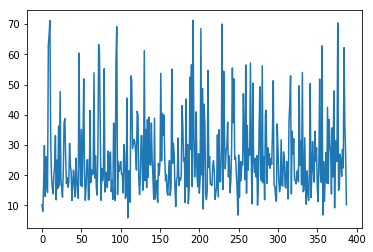

In [197]:
plt.plot(test_predictions)

In [198]:
rel_diff = []
for i in range(len(test_predictions)):
    rel_diff.append((test_predictions[i] - test_label_flat[i])/100)

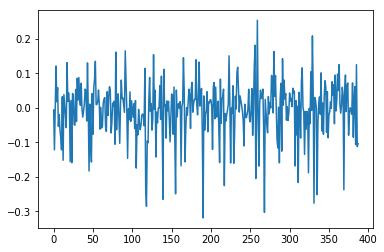

In [199]:
plt.plot(rel_diff)

Front end test

In [35]:
lat = -24
lon = -67
cor = 1
ida = 35

In [36]:
test_mean

array([-12.60024   , -47.14386286,   0.512     ,  39.61371429])

In [37]:
test_std

array([ 8.72977993,  9.02184062,  0.49985598, 23.55267496])

In [38]:
lat_norm = (lat - test_mean[0])/test_std[0]
lon_norm = (lon - test_mean[1])/test_std[1]
cor_norm = (cor - test_mean[2])/test_std[2]
ida_norm = (ida - test_mean[3])/test_std[3]

In [39]:
input = np.array([[lat_norm,lon_norm,cor_norm,ida_norm]])

In [40]:
input

array([[-1.30584735, -2.20089647,  0.97628121, -0.19588918]])

In [41]:
Risco = model.predict(input).flatten()

In [42]:
Risco[0]

36.582886

Reading info from outputs of Google Forms

In [43]:
dict_cor = {"Branca": 0, "Negra" : 1, "Preta": 1, "Indígena": 0.6, "Amarela": 0.2, "Parda": 0.9}
dict_states = {"AC": [-9.97,-67.81], "AP": [0.03, 51.06],"AM":[-3.1,-60.02],
               "PA": [-1.45,-48.5], "RO": [-8.76,-63.9],"RR":[2.82,-60.67],
               "TO": [-10.16,-48.33], "AL": [-9.66,-35.73], "BA":[-12.97,-38.51],
               "CE": [-3.71,-38.54], "MA": [-2.53,-44.3], "PB": [-7.11,-34.86],
               "PE": [-8.05,-34.88], "PI": [-5.08,-42.8], "RN": [-5.79,-35.2],
               "SE": [-10.91,-37.07],"ES": [-20.31,-40.33], "MG": [-19.81,-43.95],
               "RJ": [-22.9,-43.2], "SP": [-23.54,-46.63], "PR": [-25.42,-49.27],
               "RS": [-30.03,-51.23],"SC": [-27.59,-48.54], "DF": [-15.78,-47.93],
               "GO": [-16.67,-49.25], "MT": [-15.59,-56.09], "MS": [-20.44,-54.64]}

In [72]:
df_form = pd.read_csv('APP - Ada Pela Paz (Pesquisa).csv', sep=',')

In [73]:
df_form.head()

Timestamp           Username  \
0  2018/12/09 6:21:18 AM GMT-2  elisa@hotmail.com   
1  2018/12/09 6:22:00 AM GMT-2   xuxa@hotmail.com   
2  2018/12/09 6:22:26 AM GMT-2  anita@hotmail.com   
3  2018/12/09 6:22:53 AM GMT-2   tati@hotmail.com   
4  2018/12/09 6:23:18 AM GMT-2   mara@hotmail.com   

  Amiga, em qual estado você vive?  Qual a sua idade?  \
0                               GO                 28   
1                               RJ                 50   
2                               DF                 30   
3                               MG                 17   
4                               CE                 25   

  Qual é a cor ou raça que você se identifica?  
0                                     Indígena  
1                                       Branca  
2                                        Parda  
3                                        Negra  
4                                        Preta

In [47]:
np_form = df_form.values

In [71]:
lat_list = []
lon_list = []

est_list = []
rac_list = []

cor_list = []
ida_list = []
risco_list = []
email_list = []

f = open('RiscoFile.txt','w')


for ele in range(len(np_form)):
    lat_gf = dict_states[np_form[ele][2]][0]
    lon_gf = dict_states[np_form[ele][2]][1]
    cor_gf = dict_cor[np_form[ele][4]]
    ida_gf = np_form[ele][3]
    email_gf = np_form[ele][1]
    
    est_gf = np_form[ele][2]
    rac_gf = np_form[ele][4]
    
    #print(lat_gf, lon_gf, cor_gf, ida_gf)
    
    lat_norm = (lat_gf - test_mean[0])/test_std[0]
    lon_norm = (lon_gf - test_mean[1])/test_std[1]
    cor_norm = (cor_gf - test_mean[2])/test_std[2]
    ida_norm = (ida_gf - test_mean[3])/test_std[3]
    
    input_gf = np.array([[lat_norm,lon_norm,cor_norm,ida_norm]])
    
    #print(input_gf)
    
    risco_gf = model.predict(input_gf).flatten()[0]

    lat_list.append(lat_gf)
    lon_list.append(lon_gf)
    cor_list.append(cor_gf)
    ida_list.append(ida_gf)
    risco_list.append(risco_gf)
    email_list.append(email_gf)
    
    est_list.append(est_gf)
    rac_list.append(rac_gf)

    
dict_df = {'lat': lat_list, 'lon': lon_list, 'cordepele': cor_list, 'idade': ida_list, 
           'facRisco': risco_list, 'email': email_list, 'estado': est_list, 'raca': rac_list}
df_output = pd.DataFrame(data=dict_df) 
df_output.to_csv("DataUsuarios.csv", encoding='utf-8', index=False)

# Pretty print the dataframe as an html table to a file
#intermediate_html = '/tmp/intermediate.html'
#df_output.to_html(intermediate_html)

Retroalimentacao dos dados

In [55]:
ra_header_names = ['lat', 'lon', 'cordepele', 'idade', 'facRisco']

In [56]:
df_old = df.get(header_names)
df_new = df_output.get(header_names)

In [57]:
df_ra = pd.concat([df_old, df_new])

In [58]:
df_ra.to_csv("RetroData.csv", encoding='utf-8', index=False)

Provas

In [57]:
lat_gf = dict_states[np_form[0][1]][0]
lon_gf = dict_states[np_form[0][1]][1]
cor_gf = dict_cor[np_form[0][3]]
ida_gf = np_form[0][2]

In [58]:
print(lat_gf, lon_gf, cor_gf, ida_gf)

(-23.54, -46.63, 0, 30)


In [59]:
lat_norm = (lat_gf - test_mean[0])/test_std[0]
lon_norm = (lon_gf - test_mean[1])/test_std[1]
cor_norm = (cor_gf - test_mean[2])/test_std[2]
ida_norm = (ida_gf - test_mean[3])/test_std[3]

In [60]:
input_gf = np.array([[lat_norm,lon_norm,cor_norm,ida_norm]])

In [61]:
print(input_gf)

[[-1.24329413  0.00777749 -0.96076892 -0.38860459]]


In [62]:
Risco_gf = model.predict(input_gf).flatten()[0]

In [63]:
print(Risco_gf)

21.798792
